<a href="https://colab.research.google.com/github/AnnmariyaFrancis/ICT-Assignments/blob/main/bootcamp_3_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('/content/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
df.duplicated().sum()

0

Cabin column is dropped because of too many missing values Name and Ticket dropped because it is unique at each column

In [13]:
df2 = df.drop(columns=['Name','Ticket','Cabin'])

Dropped 2 rows where embarked is null

In [14]:
df2.dropna(inplace=True, subset=['Embarked'])

In [15]:
data = df2.values
X = data[:, 2:]
print(X)

[[3 'male' 22.0 ... 0 7.25 'S']
 [1 'female' 38.0 ... 0 71.2833 'C']
 [3 'female' 26.0 ... 0 7.925 'S']
 ...
 [3 'female' nan ... 2 23.45 'S']
 [1 'male' 26.0 ... 0 30.0 'C']
 [3 'male' 32.0 ... 0 7.75 'Q']]


In [16]:
y = data[:,1]
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0
 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1
 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0
 0 1 1 0 1 0 0 1 0 0 0 0 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#Splitting the array into test and train sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(711, 7)
(178, 7)
(711,)
(178,)


In [21]:
print(X_train)

[[3 'male' nan ... 0 8.05 'S']
 [3 'male' 19.0 ... 0 10.1708 'S']
 [3 'male' nan ... 0 7.75 'Q']
 ...
 [3 'male' 26.0 ... 0 14.4542 'C']
 [2 'male' 44.0 ... 0 26.0 'S']
 [3 'male' 21.0 ... 0 8.05 'S']]


In [22]:
from sklearn.impute import SimpleImputer

In [23]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

Replacing null values in age with mode

In [24]:
imputer.fit(X_train[:, 2:3])

SimpleImputer(strategy='most_frequent')

In [25]:
X_train[:, 2:3] = imputer.transform(X_train[:, 2:3])
print(X_train)

[[3 'male' 24.0 ... 0 8.05 'S']
 [3 'male' 19.0 ... 0 10.1708 'S']
 [3 'male' 24.0 ... 0 7.75 'Q']
 ...
 [3 'male' 26.0 ... 0 14.4542 'C']
 [2 'male' 44.0 ... 0 26.0 'S']
 [3 'male' 21.0 ... 0 8.05 'S']]


In [26]:
X_test[:, 2:3] = imputer.transform(X_test[:, 2:3])
print(X_test)

[[2 'female' 36.0 ... 0 13.0 'S']
 [2 'female' 50.0 ... 1 26.0 'S']
 [3 'male' 48.0 ... 0 7.8542 'S']
 ...
 [1 'male' 22.0 ... 0 135.6333 'C']
 [3 'male' 22.0 ... 0 8.05 'S']
 [2 'male' 24.0 ... 0 10.5 'S']]


Min Max Feature Scaling on columns Age and Fare

In [27]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))

In [28]:
X_train[:,(2,5)] = min_max_scaler.fit_transform(X_train[:,(2,5)])
X_test[:,(2,5)] = min_max_scaler.transform(X_test[:,(2,5)])

In [29]:
print(X_train)

[[3 'male' 0.2963056044232219 ... 0 0.03060836501901141 'S']
 [3 'male' 0.2334757476752953 ... 0 0.038672243346007606 'S']
 [3 'male' 0.2963056044232219 ... 0 0.029467680608365018 'Q']
 ...
 [3 'male' 0.32143754712239253 ... 0 0.05495893536121673 'C']
 [2 'male' 0.5476250314149284 ... 0 0.09885931558935361 'S']
 [3 'male' 0.2586076903744659 ... 0 0.03060836501901141 'S']]


In [30]:
print(X_test)

[[2 'female' 0.4470972606182458 ... 0 0.049429657794676805 'S']
 [2 'female' 0.6230208595124404 ... 1 0.09885931558935361 'S']
 [3 'male' 0.5978889168132697 ... 0 0.029863878326996197 'S']
 ...
 [1 'male' 0.2711736617240512 ... 0 0.515715969581749 'C']
 [3 'male' 0.2711736617240512 ... 0 0.03060836501901141 'S']
 [2 'male' 0.2963056044232219 ... 0 0.039923954372623575 'S']]


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [32]:
#Encoding Sex and Embarked columns using OneHotEncoder

In [33]:
ct = ColumnTransformer(transformers=[('encode', OneHotEncoder(),[1,-1])], remainder='passthrough')

In [34]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [35]:
print(X_train)

[[0.0 1.0 0.0 ... 0 0 0.03060836501901141]
 [0.0 1.0 0.0 ... 0 0 0.038672243346007606]
 [0.0 1.0 0.0 ... 0 0 0.029467680608365018]
 ...
 [0.0 1.0 1.0 ... 1 0 0.05495893536121673]
 [0.0 1.0 0.0 ... 1 0 0.09885931558935361]
 [0.0 1.0 0.0 ... 0 0 0.03060836501901141]]


In [36]:
print(X_test)

[[1.0 0.0 0.0 ... 0 0 0.049429657794676805]
 [1.0 0.0 0.0 ... 0 1 0.09885931558935361]
 [0.0 1.0 0.0 ... 0 0 0.029863878326996197]
 ...
 [0.0 1.0 1.0 ... 0 0 0.515715969581749]
 [0.0 1.0 0.0 ... 0 0 0.03060836501901141]
 [0.0 1.0 0.0 ... 0 0 0.039923954372623575]]


In [37]:
df_train = pd.DataFrame(X_train)
df_train

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,1.0,3,0.296306,0,0,0.030608
1,0.0,1.0,0.0,0.0,1.0,3,0.233476,0,0,0.038672
2,0.0,1.0,0.0,1.0,0.0,3,0.296306,0,0,0.029468
3,0.0,1.0,0.0,0.0,1.0,3,0.296306,0,0,0.030608
4,0.0,1.0,1.0,0.0,0.0,1,0.723549,0,2,0.430703
...,...,...,...,...,...,...,...,...,...,...
706,1.0,0.0,1.0,0.0,0.0,1,0.472229,0,0,0.865114
707,0.0,1.0,0.0,1.0,0.0,3,0.296306,1,0,0.091825
708,0.0,1.0,1.0,0.0,0.0,3,0.321438,1,0,0.054959
709,0.0,1.0,0.0,0.0,1.0,2,0.547625,1,0,0.098859


In [38]:
df_test = pd.DataFrame(X_test)
df_test

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,1.0,2,0.447097,0,0,0.04943
1,1.0,0.0,0.0,0.0,1.0,2,0.623021,0,1,0.098859
2,0.0,1.0,0.0,0.0,1.0,3,0.597889,0,0,0.029864
3,1.0,0.0,0.0,1.0,0.0,3,0.195778,0,0,0.029468
4,0.0,1.0,0.0,0.0,1.0,3,0.170646,5,2,0.178327
...,...,...,...,...,...,...,...,...,...,...
173,0.0,1.0,0.0,0.0,1.0,3,0.296306,0,0,0.029642
174,0.0,1.0,1.0,0.0,0.0,3,0.132948,0,0,0.071435
175,0.0,1.0,1.0,0.0,0.0,1,0.271174,0,0,0.515716
176,0.0,1.0,0.0,0.0,1.0,3,0.271174,0,0,0.030608


In [39]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn import metrics

In [40]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [42]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [43]:
log_pred = logr.predict(X_test)
log_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0])

In [44]:
confusion_matrix = metrics.confusion_matrix(y_test, log_pred)
confusion_matrix

array([[90, 15],
       [15, 58]])

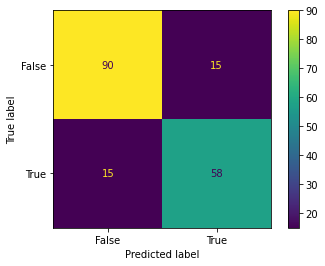

In [45]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()

In [46]:
accuracy = metrics.accuracy_score(y_test, log_pred)
accuracy

0.8314606741573034

In [47]:
precision = metrics.precision_score(y_test, log_pred)
precision

0.7945205479452054

### CET Dataset

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

In [74]:
df1=pd.read_csv('/content/CET_dataset.csv')
df1.head()

,CET_score,Admitted
0,480,1
1,450,1
2,390,1
3,410,1
4,380,1


In [75]:
df1.shape

(160, 2)

In [76]:
df1.isnull().sum()

CET_score    0
Admitted     0
dtype: int64

In [77]:
df1.duplicated().any()

True

In [78]:
df1[df1.duplicated()]

,CET_score,Admitted
6,390,1
9,390,1
11,390,1
12,410,1
13,380,1
...,...,...
155,350,0
156,370,1
157,280,0
158,290,0


In [79]:
data1=df1.values

In [80]:
X1=data1[:,0:1]
y1=data1[:,1]

In [81]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=213)

In [60]:
X1_train.shape

(128, 1)

In [82]:
X1_test.shape

(32, 1)

In [63]:
log_model1=LogisticRegression()

In [83]:
log_model1.fit(X1_train,y1_train)

LogisticRegression()

In [84]:
pred1=log_model1.predict(X1_test)
pred1

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [85]:
accuracy_score(y1_test,pred1)

0.9375

In [86]:
conf_matrix1=confusion_matrix(y1_test,pred1)
conf_matrix1

array([[12,  2],
       [ 0, 18]])

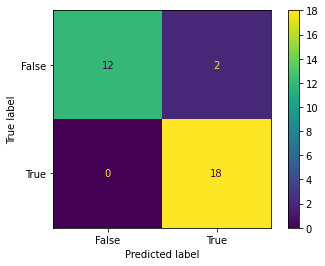

In [87]:
cm_display1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix1, display_labels=[False, True])
cm_display1.plot()
plt.show()

In [94]:
print(log_model1.predict(np.array([350]).reshape(-1,1)))

[0]


In [95]:
print(log_model1.predict(np.array([370]).reshape(-1,1)))

[1]


### Framingham Dataset

In [97]:
df3=pd.read_csv('/content/framingham.csv')

In [98]:
df3.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [99]:
df3.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

In [100]:
df3.duplicated().sum()

0

In [102]:
df3.dropna(inplace=True, subset=['education'])

In [103]:
data = df2.values
X = data[:, 2:]
print(X)

[[  4.   0.   0. ...  80.  77.   0.]
 [  2.   0.   0. ...  95.  76.   0.]
 [  1.   1.  20. ...  75.  70.   0.]
 ...
 [  2.   1.  20. ...  84.  86.   0.]
 [  1.   1.  15. ...  86.  nan   0.]
 [  2.   0.   0. ...  80. 107.   0.]]
